# Exploratory Data Analysis On dataset

In [551]:
# put all your library imports here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

## Data preparation and cleaning

In [552]:
# Read data
data = pd.read_csv("Electricity_generation_yearly.csv")

In [572]:
data.tail(60)

,NUTS0_code,datetime,energy_carrier,electricity_generation
270,PL,2015-01-01,Biomass,6682
271,PL,2015-01-01,Hydro,2459
272,PL,2015-01-01,Wind,10365
273,PL,2015-01-01,PV,44
274,PL,2015-01-01,No information on source,0
275,PT,2015-01-01,Nuclear,0
276,PT,2015-01-01,Lignite,0
277,PT,2015-01-01,Hard coal,13679
278,PT,2015-01-01,Natural gas,9806
279,PT,2015-01-01,Oil,99


In [554]:
data.shape

(330, 4)

### Desciptive statistics (desccribe, missing data)

In [557]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NUTS0_code              330 non-null    object
 1   datetime                330 non-null    object
 2   energy_carrier          330 non-null    object
 3   electricity_generation  330 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 10.4+ KB


In [558]:
data.describe()

,electricity_generation
count,330.000000
mean,9282.584848
std,29797.970208
min,0.000000
25%,0.000000
50%,256.000000
75%,5332.000000
max,416796.000000


In [559]:
# Checking for null values 
data.isnull().sum().sort_values(ascending = False)

NUTS0_code                0
datetime                  0
energy_carrier            0
electricity_generation    0
dtype: int64

In [560]:
# Check duplicates
data.duplicated().sum()

0

## Exploratory Analysis and visualization 

### Exploration of features (unique)

In [561]:
data.nunique()
# this gives us the number of unique values. 

NUTS0_code                 30
datetime                    1
energy_carrier             11
electricity_generation    198
dtype: int64

In [562]:
data["energy_carrier"].unique()

array(['Nuclear', 'Lignite', 'Hard coal', 'Natural gas', 'Oil',
       'Other fossil fuels', 'Biomass', 'Hydro', 'Wind ', 'PV',
       'No information on source'], dtype=object)

In [564]:
data["NUTS0_code"].unique()

array(['AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI',
       'FR', 'UK', 'EL', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV',
       'NL', 'NO', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK'], dtype=object)

In [565]:
data["datetime"].unique()

array(['2015/01/01 00:00:00'], dtype=object)

In [566]:
data["electricity_generation"].unique()

array([     0,   2972,   7536,    854,  36240,   3989,   7755,  24572,
         4016,  20835,    101,   2794,   1367,   5380,   3038,    175,
        14305,  18772,    966,   1321,    193,   6155,   1436,   1371,
        22095,  39554,    132,   4174,    231,  25340,  32238,   4825,
         4902,     41,   1893,   2963,    563,   2223,  86767, 143068,
       107131,  53155,   5245,  10876,  38465,  23657,  75680,  35150,
         6911,   3514,     81,   2345,     20,  14086,    593,    757,
           28,    696,  54755,   4459,  48581,  48594,  13005,   4636,
        30813,  48107,  13305,   1265,  22323,   5518,   5034,    184,
         2719,  10685,  16586,   2329,    779, 416796,   8605,  22082,
         3375,   7878,  58724,  21067,   7432,  65681,  84756,  84613,
           11,   7973,  23963,   1427,  19417,   7269,    221,   6099,
         3744,   3573,   2096,    808,   5657,    788,  14861,   5493,
          492,   3160,     49,   1642,    227,    670,     13,   2522,
      

In [567]:
# Convert datetime column to datetime format
data['datetime'] = pd.to_datetime(data['datetime'])

### visualize cartegorical and continues data

In [568]:
data.head()

,NUTS0_code,datetime,energy_carrier,electricity_generation
0,AT,2015-01-01,Nuclear,0
1,AT,2015-01-01,Lignite,0
2,AT,2015-01-01,Hard coal,2972
3,AT,2015-01-01,Natural gas,7536
4,AT,2015-01-01,Oil,854


#### Total Electricity Generated by each country in 2015

In [569]:
# group the data by country and sum the electricity generation values
grouped = data.groupby('NUTS0_code')['electricity_generation'].sum()

print(grouped)

NUTS0_code
AT     59346
BE     62278
BG     44519
CH     61781
CY      4405
CZ     74988
DE    579194
DK     27550
EE      1481
EL     40323
ES    267520
FI     66157
FR    545959
HR      9611
HU     26607
IE     26502
IS     13683
IT    263990
LT      4335
LU      2672
LV      5012
NL     15373
NO    145020
PL    141039
PT     47925
RO     61700
SE    157422
SI     13777
SK     24660
UK    268424
Name: electricity_generation, dtype: int64


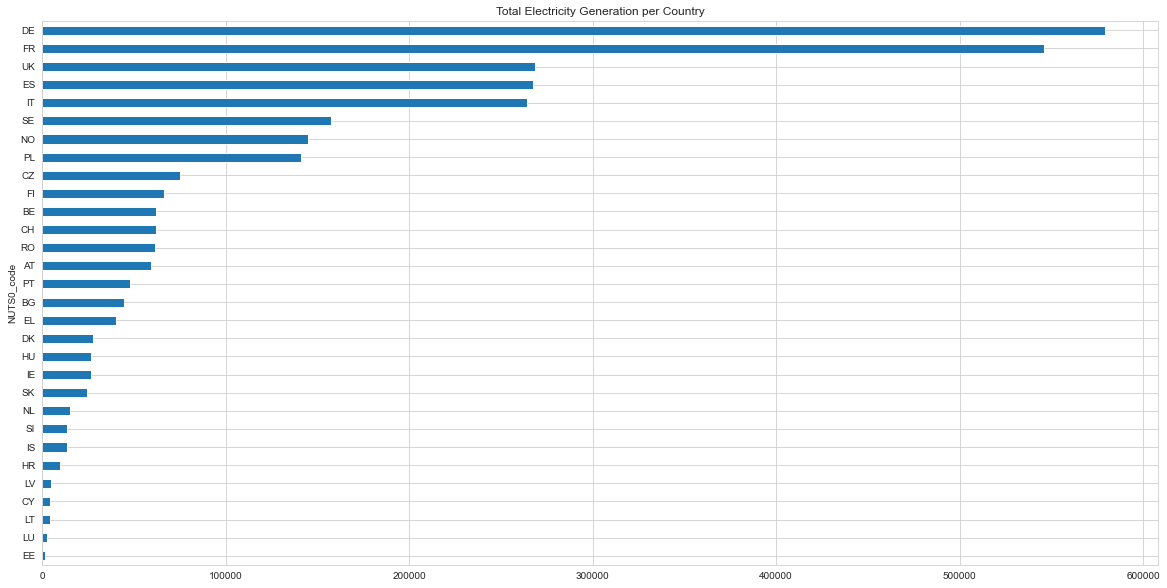

In [570]:
grouped_sorted = grouped.sort_values(ascending=True)
plt.rcParams['figure.figsize'] = (20, 10)
grouped_sorted.plot(kind='barh')
plt.title('Total Electricity Generation per Country')
plt.show()

### Visualize the distribution of electricity generated per energy carrier for each region

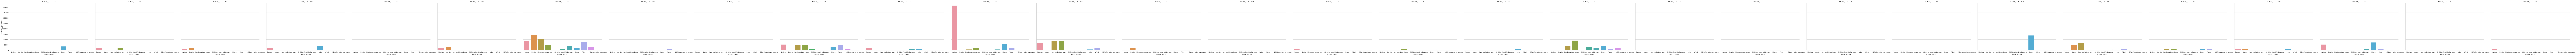

In [495]:
sns.catplot(x='energy_carrier', y='electricity_generation', col='NUTS0_code', kind='bar', data=data ,  aspect=1.5)
plt.show()

### Showing the top 3 energy carrier for electricity per region

In [498]:
# group the data by NUTS0_code and energy_carrier, and sum the electricity_generation
grouped = data.groupby(['NUTS0_code', 'energy_carrier'])['electricity_generation'].sum()

# sort the data by NUTS0_code and electricity_generation, and group by NUTS0_code
sorted_grouped = grouped.reset_index().sort_values(['NUTS0_code', 'electricity_generation'], ascending=[True, False])
sorted_grouped = sorted_grouped.groupby('NUTS0_code').head(3)

# print the top three energy carriers per region
for region, group in sorted_grouped.groupby('NUTS0_code'):
    print(f"Top three energy carriers in {region}: {', '.join(group['energy_carrier'].values)}")

Top three energy carriers in AT: Hydro, No information on source, Natural gas
Top three energy carriers in BE: Nuclear, Natural gas, Wind 
Top three energy carriers in BG: Lignite, Nuclear, Hydro
Top three energy carriers in CH: Hydro, Nuclear, Wind 
Top three energy carriers in CY: Oil, Wind , Biomass
Top three energy carriers in CZ: Lignite, Nuclear, Natural gas
Top three energy carriers in DE: Lignite, Hard coal, Nuclear
Top three energy carriers in DK: Wind , Hard coal, Natural gas
Top three energy carriers in EE: Biomass, Wind , Hydro
Top three energy carriers in EL: Lignite, Natural gas, Hydro
Top three energy carriers in ES: Nuclear, Natural gas, Hard coal
Top three energy carriers in FI: Nuclear, Hydro, Biomass
Top three energy carriers in FR: Nuclear, Hydro, Natural gas
Top three energy carriers in HR: Hydro, Hard coal, Natural gas
Top three energy carriers in HU: Nuclear, Lignite, Natural gas
Top three energy carriers in IE: Natural gas, Wind , Hard coal
Top three energy carr

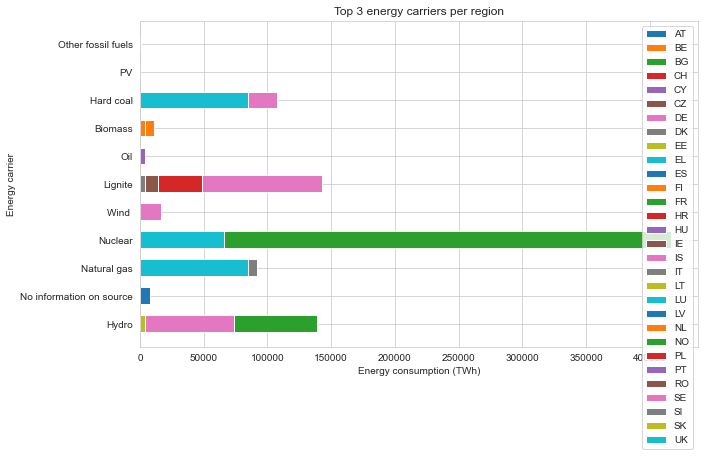

In [499]:
# Group data by region and sum the energy consumption by energy carrier
grouped_data = data.groupby(['NUTS0_code', 'energy_carrier'])['electricity_generation'].sum().reset_index()

# Get the top 3 energy carriers per region
top_3 = grouped_data.groupby('NUTS0_code').apply(lambda x: x.nlargest(3, 'electricity_generation')).reset_index(drop=True)

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, (region, group) in enumerate(top_3.groupby('NUTS0_code')):
    ax.barh(y=group['energy_carrier'], width=group['electricity_generation'], height=0.6, color=f'C{i}')

ax.set_xlabel('Energy consumption (TWh)')
ax.set_ylabel('Energy carrier')
ax.set_title('Top 3 energy carriers per region')
ax.legend(top_3['NUTS0_code'].unique())

plt.show()

## Importing data for electricity price per region

In [546]:
data_price = pd.read_csv('Electricity_prices_2015.csv')

In [547]:
data_price.head()

,NUTS0_code,datetime,year,hour,price
0,AT,2015/01/01 00:00:00,2015,1,30.02
1,AT,2015/01/01 01:00:00,2015,2,30.57
2,AT,2015/01/01 02:00:00,2015,3,30.25
3,AT,2015/01/01 03:00:00,2015,4,30.29
4,AT,2015/01/01 04:00:00,2015,5,30.63


In [548]:
data_price.shape

(254040, 5)

## Understanding the variable of the data

### Desciptive statistics (desccribe, missing data)

In [549]:
data_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254040 entries, 0 to 254039
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   NUTS0_code  254040 non-null  object 
 1   datetime    254040 non-null  object 
 2   year        254040 non-null  int64  
 3   hour        254040 non-null  int64  
 4   price       254040 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 9.7+ MB


In [517]:
data_price.describe()

,year,hour,price
count,254040.0,254040.00000,254040.000000
mean,2015.0,4380.50000,39.996202
std,0.0,2528.79914,17.378832
min,2015.0,1.00000,-79.940000
25%,2015.0,2190.75000,28.040000
50%,2015.0,4380.50000,39.940000
75%,2015.0,6570.25000,50.990000
max,2015.0,8760.00000,920.770000


In [518]:
#Checking for missing/ null values 
data_price.isna().sum()

NUTS0_code    0
datetime      0
year          0
hour          0
price         0
dtype: int64

In [519]:
data_price.dtypes

NUTS0_code     object
datetime       object
year            int64
hour            int64
price         float64
dtype: object

In [520]:
data_price.duplicated().sum()

0

## Descriptive Analysis

#### Checking the correlation of "Price" with other variable 

In [521]:
# Compute the correlation between the "price" column and other columns
correlation_matrix = data_price.corr()
price_correlations = correlation_matrix['price']

# Print the correlation values
print(price_correlations)

year          NaN
hour     0.034126
price    1.000000
Name: price, dtype: float64


## Eploratory Analysis and visualization 

#####  Line plot of the hourly prices over time for each country.

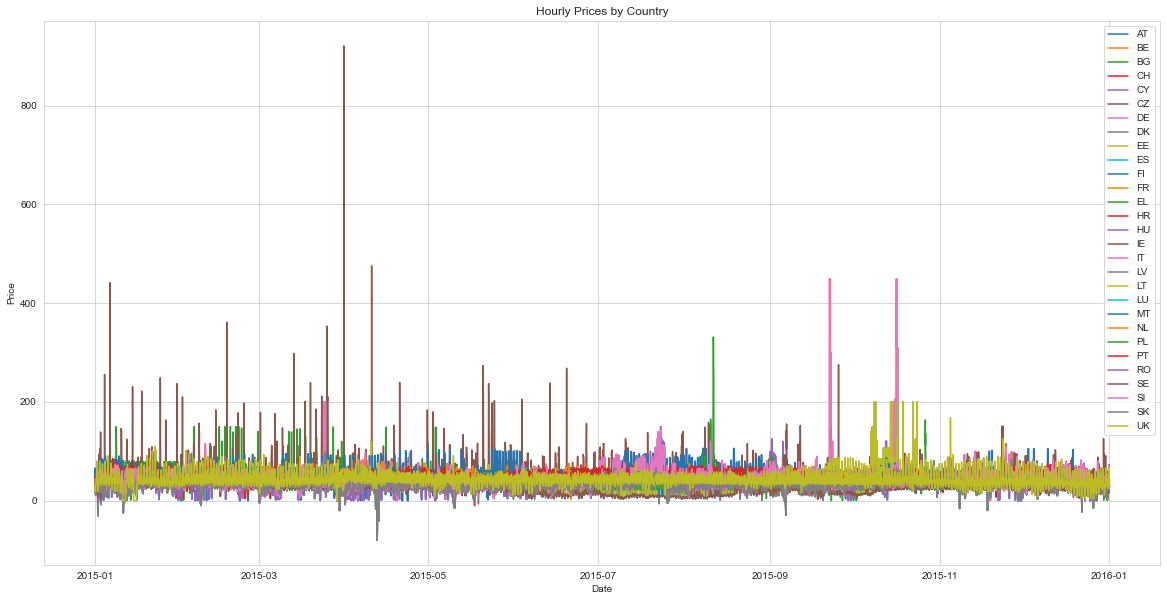

In [522]:
# Convert the "datetime" column to a datetime object
data_price['datetime'] = pd.to_datetime(data_price['datetime'])

# Create a separate line plot for each country
for country in data_price['NUTS0_code'].unique():
    # Subset the dataframe for the current country
    country_df = data_price[data_price['NUTS0_code'] == country]
    
    # Create the line plot
    plt.plot(country_df['datetime'], country_df['price'], label=country)

# Add a legend, title, and axis labels to the plot
plt.legend()
plt.title('Hourly Prices by Country')
plt.xlabel('Date')
plt.ylabel('Price')

# Display the plot
plt.show()

#### Shows the Distribution of price

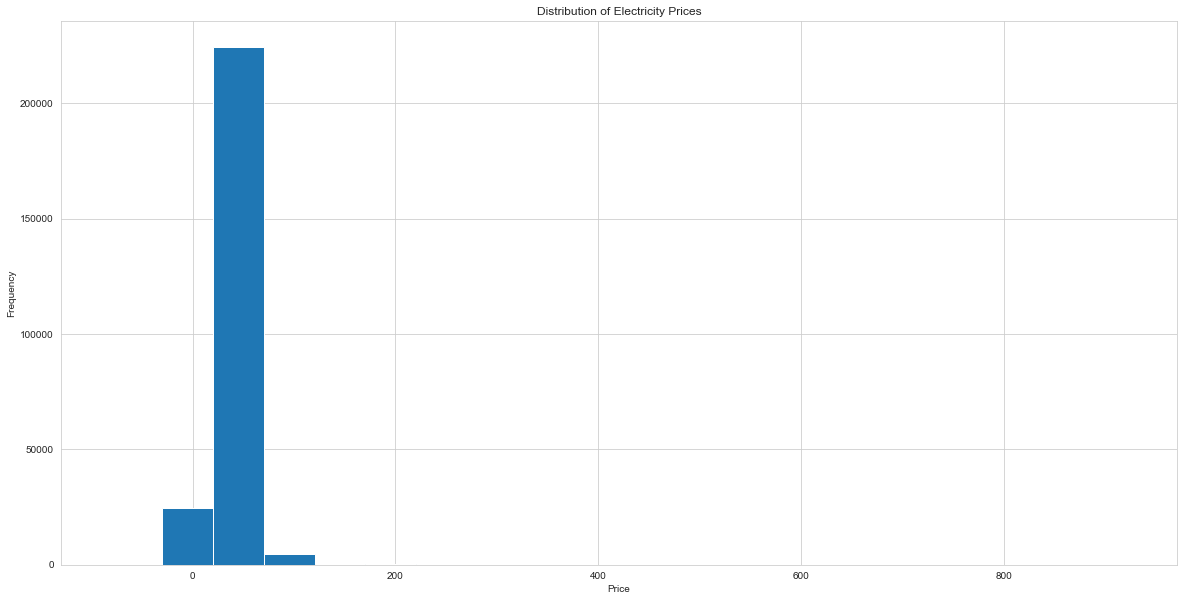

In [523]:
# Create a histogram of the "price" column
plt.hist(data_price['price'], bins=20)

# Add a title and axis labels to the plot
plt.title('Distribution of Electricity Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

#### Total price for electricity per region

In [460]:
# group the data by country and sum the electricity generation values
grouped = data_price.groupby('NUTS0_code')['price'].sum()

grouped_sorted = grouped.sort_values(ascending=True)
print(grouped_sorted)

NUTS0_code
SE    192740.46000
DK    200547.99000
FI    259790.36000
AT    278265.03000
CZ    278265.03000
DE    278265.03000
LU    278265.03000
SK    278265.03000
PL    318262.67000
BG    318993.03346
RO    318993.03346
FR    336627.43000
NL    350930.48000
UK    352369.32000
CH    352900.15000
HU    355645.10000
SI    362892.18000
HR    362892.18000
LT    367204.22000
LV    367204.22000
EE    367204.22000
IT    391385.78000
BE    391385.78000
ES    440794.63000
PT    440794.63000
EL    454838.27000
IE    455622.54000
MT    504645.69000
CY    504645.69000
Name: price, dtype: float64


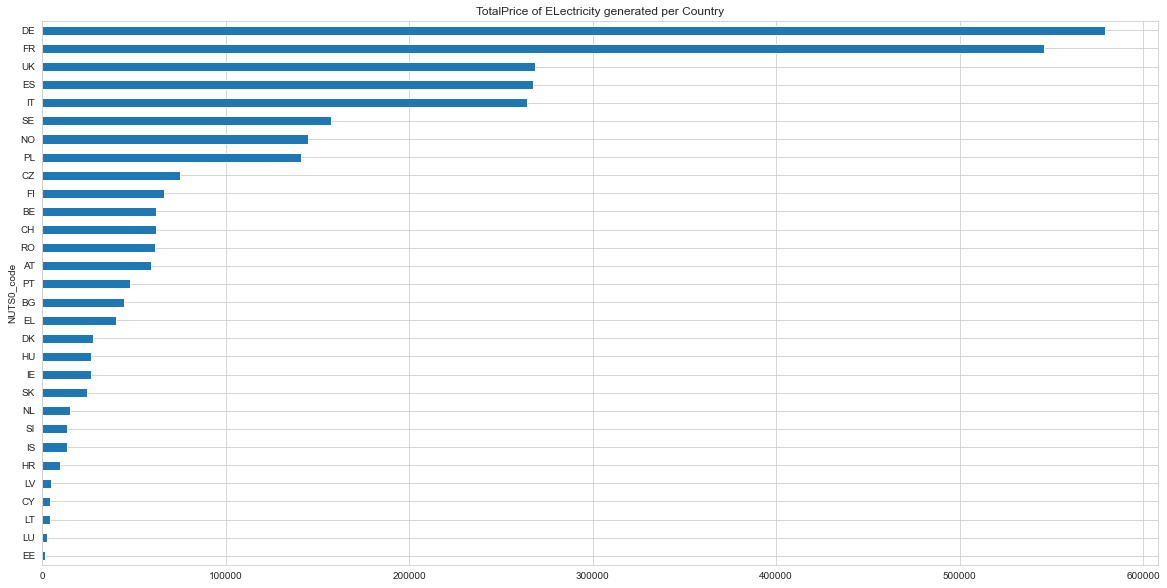

In [550]:
plt.rcParams['figure.figsize'] = (20, 10)
grouped_sorted.plot(kind='barh')
plt.title('TotalPrice of ELectricity generated per Country')
plt.show()

####  Boxplots of the "price" column by day of the week and by month 

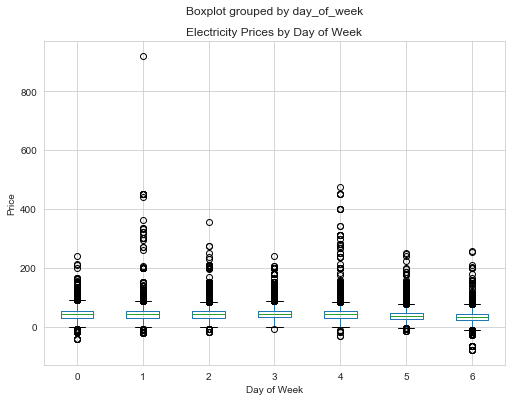

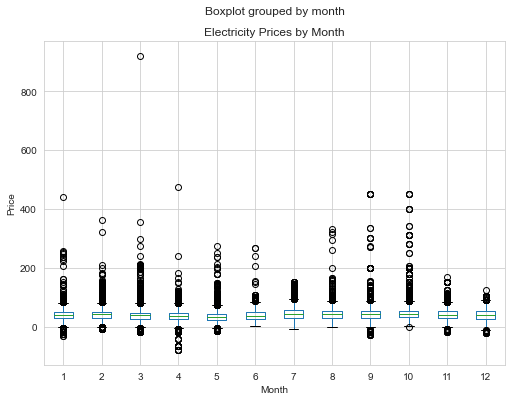

In [471]:
# Convert the "datetime" column to a datetime object and extract the day of the week and month
data_price['datetime'] = pd.to_datetime(data_price['datetime'])
data_price['day_of_week'] = data_price['datetime'].dt.dayofweek
data_price['month'] = data_price['datetime'].dt.month

# Create a boxplot of the "price" column by day of the week
data_price.boxplot(column='price', by='day_of_week', figsize=(8, 6))
plt.title('Electricity Prices by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Price')
plt.show()

# Create a boxplot of the "price" column by month
data_price.boxplot(column='price', by='month', figsize=(8, 6))
plt.title('Electricity Prices by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()